In [1]:
"""
前回の復習
前回の講義で学んだこと

Seaborn
    便利な機能が多く含まれた可視化ライブラリ
"""

'\n前回の復習\n前回の講義で学んだこと\n\nSeaborn\n    便利な機能が多く含まれた可視化ライブラリ\n'

In [2]:
"""
本講座のゴール
    Kaggle入門データセット「タイタニック」を用いて、
    タイタニック号の乗客の「生・死」を判定！
"""

'\n本講座のゴール\n    Kaggle入門データセット「タイタニック」を用いて、\n    タイタニック号の乗客の「生・死」を判定！\n'

In [4]:
"""
二つの専門用語
目的変数：予測したい変数
説明変数：目的変数を予測するためにモデルに投入する変数（学習用データのようなもの？）

前処理：機械学習モデルが扱いやすいデータに加工すること
可視化・前処理を通じて、目的変数に関連がありそうな説明変数を選び抜こう
"""

'\n二つの専門用語\n目的変数：予測したい変数\n説明変数：目的変数を予測するためにモデルに投入する変数（学習用データのようなもの？）\n\n前処理：機械学習モデルが扱いやすいデータに加工すること\n可視化・前処理を通じて、目的変数に関連がありそうな説明変数を選び抜こう\n'

In [5]:
"""
Day7のゴール
・機械学習の前処理の基本的な考え方を習得する
・前処理に必要なPandas操作及び可視化操作に習熟する
"""

'\nDay7のゴール\n・機械学習の前処理の基本的な考え方を習得する\n・前処理に必要なPandas操作及び可視化操作に習熟する\n'

In [6]:
"""
Day7の目次
・Titanicデータの確認
・データの可視化と前処理の方針決定
・前処理の実施
・前処理を施したデータの保存
"""

'\nDay7の目次\n・Titanicデータの確認\n・データの可視化と前処理の方針決定\n・前処理の実施\n・前処理を施したデータの保存\n'

In [8]:
"""
Titanicデータの確認
Titanicデータセットとは
・kaggleのチュートリアルとして有名なデータセット
・タイタニック号の各乗客のデータが項目別（氏名・年齢など）に入っている
    →説明変数
・訓練用のデータセットには、各乗客の死亡・生存が0,1で書かれている
    →目的変数
"""

'\nTitanicデータの確認\nTitanicデータセットとは\n・kaggleのチュートリアルとして有名なデータセット\n・タイタニック号の各乗客のデータが項目別（氏名・年齢など）に入っている\n    →説明変数\n・訓練用のデータセットには、各乗客の死亡・生存が0,1で書かれている\n    →目的変数\n'

In [9]:
# 各種インポート
# ライブラリのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# データセットのインポート
train=pd.read_csv("./titanic/train.csv") # train:訓練用データ
test=pd.read_csv("./titanic/test.csv") # test:テスト用（Kaggle提出用データ）
# trainも、testも同様の前処理を行うため、一つのリストに格納し、同時に前処理できるように
data=[train,test]

In [12]:
"""
データの概要を確認
まずはデータの概要を確認する
どのような関数を使えばよいか？
"""
# 概要の取得 データが入っている数とデータ型の確認
train.info()

# 概要からわかること
# 行数：８９１
# 列数：１２
# 欠損値あり：Non-Null Countが行数（８９１）より少ない列が二つある
# object(文字列)が混ざっている：下から二行目、５列が文字列

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
# testの概要を取得
test.info()

# 行数：４１８
# 列数：１１
# 欠損値あり
# object(文字列)が混ざっている

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [17]:
# データの中身を確認
# head(n):最初のn行を表示
# NaNは欠損値
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# tail(n):最後のn行を表示
train.tail()
# ぱっと見で気になること：名前の情報は必要？不要？

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [19]:
"""データの可視化と前処理の方針決定"""

'データの可視化と前処理の方針決定'

In [20]:
"""
これからのデータ確認の流れ
欠損値の確認
外れ値の確認
相関の確認
目的変数とその他の列との関係性を個別に確認
"""

'\nこれからのデータ確認の流れ\n欠損値の確認\n外れ値の確認\n相関の確認\n目的変数とその他の列との関係性を個別に確認\n'

In [21]:
"""
欠損値の確認
・欠損値がある場合には「置き換え処理」が必要
・trainデータの欠損値の数を表示したい、どうすれば？
"""
# カラムごとに含まれている欠損値の数を表示
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
# 補足
# notnull()で欠損値ではない数を確認
train.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

<Axes: >

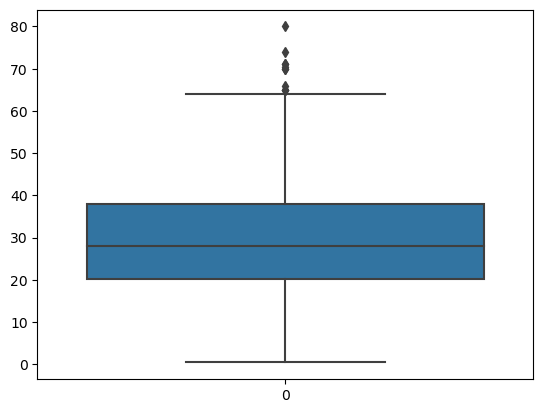

In [31]:
"""
外れ値の確認
・量的変数（例：年齢）は外れ値がないか確認する必要がある
・外れ値を検出した場合、削除や置き換えをする処理が必要
・データの外れ値の確認はどのように行うか？
    外れ値として省くべき値かどうかの判別も必要
→箱ひげ図による可視化
"""
# 外れ値の確認
# 箱ひげ図による量的変数"Age"の可視化
sns.boxplot(train["Age"])
# plt.show()はなくても描画される
# 普通にあり得る値を外れ値として省くのは危険？

<Axes: >

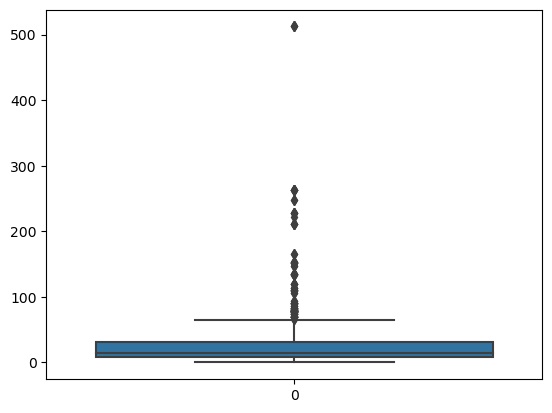

In [32]:
# 箱ひげ図による量的変数"Fare"の可視化
sns.boxplot(train["Fare"])
# 普通にあり得る値を外れ値として省くのは危険？

C:\Users\space\AppData\Local\Temp\ipykernel_9608\1848248046.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Age"], bins = 16)


<Axes: xlabel='Age', ylabel='Density'>

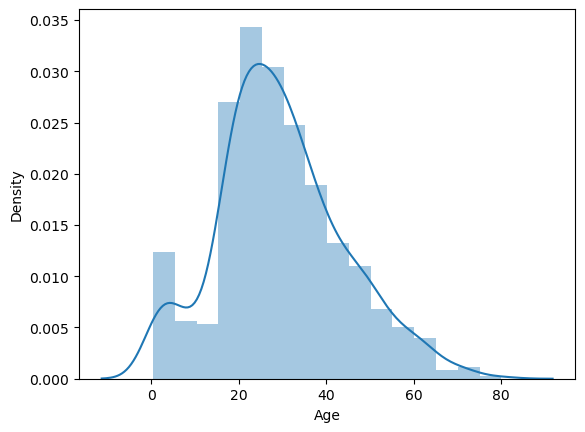

In [47]:
#「年齢」列を深堀　分布の確認
sns.distplot(train["Age"], bins = 16)
# sns.distplot(train.Age, bins = 16)でも可

In [42]:
train["Age"].value_counts().tail(15)
# 一人しかいない年齢が複数存在
# ０．５歳や、１歳ごとの年齢に意味はないと思われるため、今回はグルーピングという処理を実施

0.42     1
0.67     1
66.00    1
24.50    1
80.00    1
20.50    1
53.00    1
14.50    1
70.50    1
12.00    1
36.50    1
55.50    1
0.92     1
23.50    1
74.00    1
Name: Age, dtype: int64

In [43]:
"""
演習　「運賃」列を深堀
問題１　「運賃」列の分布を可視化せよ
問題２　「運賃」列に存在する各要素の個数を可視化せよ
"""

'\n演習\u3000「運賃」列を深堀\n問題１\u3000「運賃」列の分布を可視化せよ\n問題２\u3000「運賃」列に存在する各要素の個数を可視化せよ\n'

C:\Users\space\AppData\Local\Temp\ipykernel_9608\3052020742.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Fare"], bins = 10)


<Axes: xlabel='Fare', ylabel='Density'>

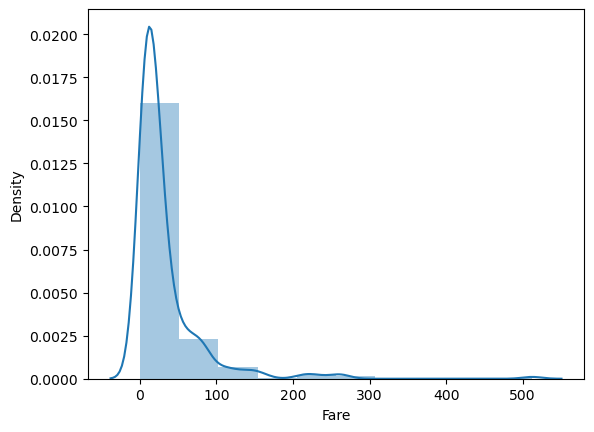

In [51]:
# 問題１
sns.distplot(train["Fare"], bins = 10)
# 左側によったロングテールな分布だとわかる

In [52]:
# 問題２
train["Fare"].value_counts().tail(15)
# 一個しかないものが多い→グループ化がよさそう

6.8583      1
8.0292      1
9.4750      1
12.0000     1
7.7292      1
9.2167      1
4.0125      1
211.5000    1
55.4417     1
75.2500     1
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, dtype: int64

C:\Users\space\AppData\Local\Temp\ipykernel_9608\2276029538.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), cmap = "summer", annot = True)


<Axes: >

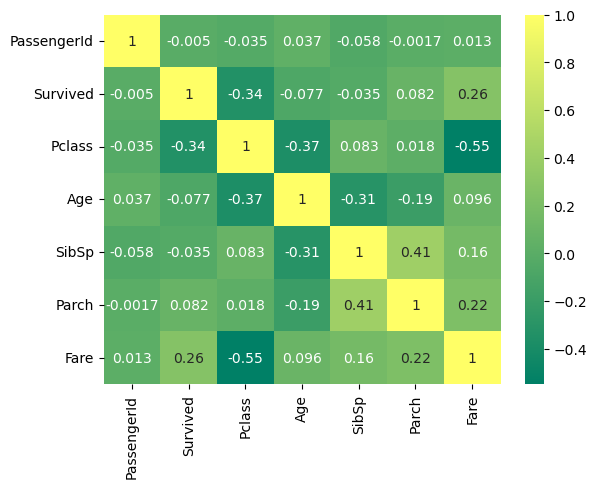

In [59]:
# 目的変数「Survived」とほかの列との関係性を可視化
# Survivedとの相関があまりに小さい量的変数は不要なデータである可能性
# seabornのheatmapを用いて量的変数の相関を可視化　-1～1で0に近いほど相関が小さい
sns.heatmap(train.corr(), cmap = "summer", annot = True)
# annot=Trueでヒートマップの中に値を追加
# Pclassは若干負の相関？　Fareは若干正の相関？

In [61]:
"""
PassengerId（乗客の通し番号）は小さすぎるか？
実際、相関だけで判断するのは難しい
特徴毎に個別調査する必要がある

例えば、x軸が説明変数、y軸が目的変数の曲線が放物線を描くとき、
相関性はありそうだが、相関係数は0になる
"""

'\nPassengerId（乗客の通し番号）は小さすぎるか？\n実際、相関だけで判断するのは難しい\n特徴毎に個別調査する必要がある\n\n例えば、x軸が説明変数、y軸が目的変数の曲線が放物線を描くとき、\n相関性はありそうだが、相関係数は0になる\n'

In [60]:
"""
一旦ここで調査結果をまとめる
・欠損値→あり
・外れ値→なし
    箱ひげ図的には「外れ」だが、値そのものは普通にありそう
・「年齢」・「運賃」→グルーピングの処理が必要
・相関関係→相関が非常に小さいものあり、不要なデータかどうか追加調査が必要
"""

'\n一旦ここで調査結果をまとめる\n・欠損値→あり\n・外れ値→なし\n    箱ひげ図的には「外れ」だが、値そのものは普通にありそう\n・「年齢」・「運賃」→グルーピングの処理が必要\n・相関関係→相関が非常に小さいものあり、不要なデータかどうか追加調査が必要\n'

In [62]:
"""
特徴を個別に調査する
実務では、重要そうなもの関係ありそうなものを優先して調査しましょう
仮説から分析の優先順位をつけていく

PassengerId(乗客の通し番号)：関係なさそう→優先度を下げる
Pclass(乗客の客室の等級)：
    高級な部屋は階層が高かったり、船の奥の方で逃げ遅れやすい可能性がありそう？
    等級が低いと騒がしい出口の近くで逃げやすそう？
"""

'\n特徴を個別に調査する\n実務では、重要そうなもの関係ありそうなものを優先して調査しましょう\n仮説から分析の優先順位をつけていく\n\nPassengerId(乗客の通し番号)：関係なさそう→優先度を下げる\nPclass(乗客の客室の等級)：\n    高級な部屋は階層が高かったり、船の奥の方で逃げ遅れやすい可能性がありそう？\n    等級が低いと騒がしい出口の近くで逃げやすそう？\n'

'\n全体で見ると、女性のほうが生存している\nこの結果から、女性のほうが生存しやすいと結論付けて良いか？\n    まだ早い\n    単に男性の乗客者数が多かっただけかも\n'

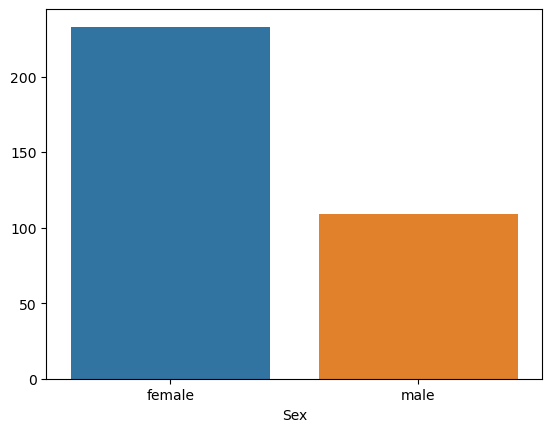

In [76]:
# 「性別」列と「生存」列の関係
# Pandasで学んだgroupby()を使う

# 男女それぞれの生存者数を棒グラフ表示
# trainデータの"Survived"列の和を性別ごとに求め、可視化する

sum_survived = train.groupby(["Sex"])["Survived"].sum() # ("Sex")のように、[]がなくても良かった
# 解説のsns.barplot(sum_survived.keys(), sum_survived.values)ではエラーが出た、バージョンの違いによるものか？
sns.barplot(x=sum_survived.index, y=sum_survived.values)

"""
全体で見ると、女性のほうが生存している
この結果から、女性のほうが生存しやすいと結論付けて良いか？
    まだ早い
    単に男性の乗客者数が多かっただけかも
"""


'\n何が言えるか？\n女性の生存率が高そう\n'

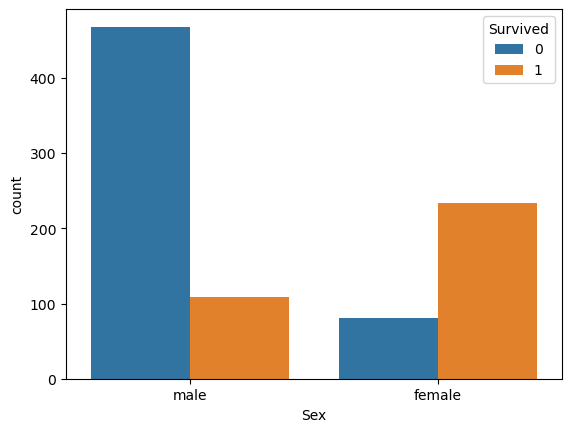

In [96]:
# trainのカラム"Survived"を"Sex"と"Survived"で集計し、棒グラフで表示
"""
なぜか、解説では二行目でエラーが出た
バージョンによるものか？
data_count = train.groupby(["Sex", "Survived"])["Survived"].count()
sns.barplot(x = data_count.index, y = data_count.values)
仕方がないので、代わりにcountplot()を使った
"""
sns.countplot(data = train, x = "Sex", hue = "Survived")
"""
何が言えるか？
女性の生存率が高そう
"""


In [99]:
# 男女それぞれの生存率を求める
"""
男女で生存率に大きな違いがある
「性別」の情報は「生存」に関連がありそう
"""
train.groupby("Sex")["Survived"].mean()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [100]:
"""
演習　「乗船した港」列と「生存」列の関係
問題１　港ごとの生存者数/死亡者を調べよ
問題２　港ごとの生存者数/死亡者を可視化せよ
問題３　港ごとの生存率を計算せよ
"""

'\n演習\u3000「乗船した港」列と「生存」列の関係\n問題１\u3000港ごとの生存者数/死亡者を調べよ\n問題２\u3000港ごとの生存者数/死亡者を可視化せよ\n問題３\u3000港ごとの生存率を計算せよ\n'

In [118]:
# 問題１
# Embarked：港、Survived = 1 で生存
# 乗船した場所と生存率をクロス集計
"""
embarked_count = train.groupby("Embarked")["Survived"].value_counts()
c = embarked_count["C"][1]/embarked_count["C"][0]
q = embarked_count["Q"][1]/embarked_count["Q"][0]
s = embarked_count["S"][1]/embarked_count["S"][0]
print(embarked_count)
print(c, q, s)
自分の回答

"""
train.groupby(["Embarked", "Survived"])["Survived"].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

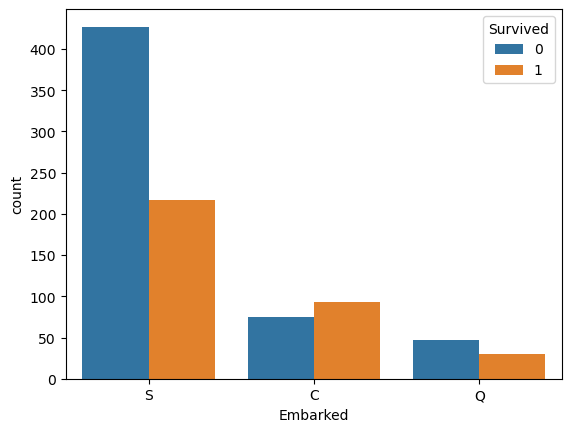

In [117]:
# 問題２
# 乗船した場所と生存率をクロス集計し、棒グラフで表示
"""
やはり解説通りにできない
data_count = train.group(["Embarked", "Survived"])["Survived"].count()
sns.barplot(data_count.keys(), data_count.values)
plt.show()
"""
sns.countplot(data = train, x = "Embarked", hue = "Survived")

In [122]:
# 問題３
# 港が同じもの同士でSurvivedの値を集計する　その平均は生存率を表す
train.groupby("Embarked")["Survived"].mean()
# 違いがないとは言えなさそう　Cが生存しやすそう

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [139]:
# 不要そうなデータ
# 以下のデータ列は、前処理で列ごと削除してよい可能性が高い
# Nameだけ加工
fuyousounadata = pd.DataFrame({"列名":["PassengerId", "Name", "Ticket", "Cabin"],
                 "理由":["生存率との相関が非常に小さい", "氏名が生死に影響するとは考えにくい", "規則性が分からない", "欠損値が多すぎる"],
                 "備考":["NaN", "ただし性別を示唆する敬称は有用な可能性", "NaN", "NaN"]})
fuyousounadata

,列名,理由,備考
0,PassengerId,生存率との相関が非常に小さい,NaN
1,Name,氏名が生死に影響するとは考えにくい,ただし性別を示唆する敬称は有用な可能性
2,Ticket,規則性が分からない,NaN
3,Cabin,欠損値が多すぎる,NaN


In [140]:
"""前処理の実施"""

'前処理の実施'

In [161]:
"""
前処理項目
・可視化によって得た情報をもとに、必要な前処理を実施
・今回の前処理項目
    ・データ加工して意味のある特徴を作る
        今回は欠損値を埋める前にこの処理を実施。理由は欠損値処理のところで
    ・欠損値処理
    ・数値データのカテゴライズ化　年齢をグループ分け
    ・不要データの削除
    ・文字列データの数値への置き換え
    
    trainとtestの同じ項目の列でどちらかにしか存在しない文字列が
    ないようにうまく置き換えるべき
"""

'\n前処理項目\n・可視化によって得た情報をもとに、必要な前処理を実施\n・今回の前処理項目\n    ・データ加工して意味のある特徴を作る\n        今回は欠損値を埋める前にこの処理を実施。理由は欠損値処理のところで\n    ・欠損値処理\n    ・数値データのカテゴライズ化\u3000年齢をグループ分け\n    ・不要データの削除\n    ・文字列データの数値への置き換え\n    \n    trainとtestの同じ項目の列でどちらかにしか存在しない文字列が\n    ないようにうまく置き換えるべき\n'

In [144]:
'''
Nameの取り扱い
氏名そのものが生死に影響するとは考えにくい
不必要なデータは排除・・・してよい？（これまでの考察を思い出して！）
    Braund, Mr. Owen Harris
今回のNameデータには敬称がついている
    ・敬称は年齢や性別を含んだ情報→これは生死と関係ありそう？
    ・適切な形で敬称の情報を抜き出すことができたら、特徴として使えそう？！
敬称を取り出す関数を作成し、Name列を加工しよう！
'''

'\nNameの取り扱い\n氏名そのものが生死に影響するとは考えにくい\n不必要なデータは排除・・・してよい？（これまでの考察を思い出して！）\n    Braund, Mr. Owen Harris\n今回のNameデータには敬称がついている\n    ・敬称は年齢や性別を含んだ情報→これは生死と関係ありそう？\n    ・適切な形で敬称の情報を抜き出すことができたら、特徴として使えそう？！\n敬称を取り出す関数を作成し、Name列を加工しよう！\n'

In [148]:
# Nameの取り扱い：正規表現を用いた敬称の抜き出し
# これから行う処理の大枠

# 処理①
# 敬称を抽出する関数を定義

# reは正規表現(regular expression)の意味
import re
def get_title(name):
    # reという標準ライブラリのsearchモジュールを使用
    # 正規表現を用いて抽出するパターンを定義(英語大文字、小文字の繰り返し)
    # "."が含まれていれば、敬称が含まれているとわかる
    # title_searchに敬称(".")が含まれている名前と、その敬称の部分だけという二つの出力が得られる
    title_search = re.search("([A-Za-z]+)\.",name)
    if title_search:
        # .group(1)で敬称の部分だけ、.group(0)で名前全文を返す
        return title_search.group(1)
    return ""

# 処理②
# Nameに対してget_titleを適用、apply()を用いる
# "Title"という列を作り、その中に全員分の敬称を収録

# data=[train,test]としているので、for de in dataでもいい
for df in [train,test]:
    # Title列にapply()で指定されたName列に関数を適用し、適用結果をTitle列に返す
    df["Title"] = df["Name"].apply(get_title)

In [149]:
# trainのTitle列の各要素の個数を表示
train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [150]:
# testのTitle列の各要素の個数を表示
test["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [157]:
"""
敬称を取り出したは良いものの、実は問題がある（前ページを見て考えよう）

サンプル数の少ないラベルはその統計的特徴を取り出しにくい
件数が少ない敬称は置き換えてまとめてしまおう（Donaはtestにしかない）
"""

# replace(置き換えたい値, 置き換え後の値)
for df in data:
    
    # "Mile","Ms","Mme"は女性の敬称なので、Missに置き換え
    df["Title"] = df["Title"].replace(["Mlle","Ms","Mme"], "Miss")
    
    # それ以外はOthersへ
    df["Title"] = df["Title"].replace(["Lady", "Countess", "Capt", "Col", "Dr", "Don", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Others")

In [158]:
# 置き換え結果の確認
train.Title.value_counts()

Mr        517
Miss      186
Mrs       125
Master     40
Others     23
Name: Title, dtype: int64

In [159]:
# 置き換え結果の確認
test.Title.value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: Title, dtype: int64

In [162]:
"""
欠損値処理
欠損しているデータ列
・trainデータセット
    ・Embarked
    ・Age
    ・Cabin
・testデータセット
    ・Fare
    ・Age
    ・Cabin
"""

'欠損値処理'

In [163]:
# 欠損値処理：Embarked

# 欠けているのはtrainデータの２名分だけ
# Embarkedは「S,C,Q」の３つの値をとる
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [165]:
# 欠けているのは２件程度なので、１番確立が高そうな"S"で補完しよう
train.Embarked=train.Embarked.fillna("S")

In [167]:
# 欠損値処理：Age

"""
どのように埋めるのが良いだろうか？
素朴なアイデア：「Age」列の平均値で埋める
実はちょっと雑。なぜ？

Ageの平均値：全乗客の年齢の平均
    男性・女性といった性別の情報などを無視する
    各性別での平均年齢は異なる
"""
# 全乗客の平均年齢
train["Age"].mean()

29.69911764705882

In [168]:
# 性別ごとの平均年齢
train.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [170]:
"""
適切な集計の下、なるべく精度高く年齢の欠損を埋めたい
今回最もよさそうな集計条件は？　実は性別ではない！

敬称「Title」
    性別の情報だけでなく年齢の情報も含む！
"""
# Titleごとの平均年齢
train.groupby("Title")["Age"].mean()

Title
Master     4.574167
Miss      21.860000
Mr        32.368090
Mrs       35.898148
Others    45.545455
Name: Age, dtype: float64

In [172]:
"""
trainとtestに対して以下の処理を行う
①「敬称」列で集計して、敬称ごとに年齢の平均を出す
②敬称ごとに欠損値の穴埋め処理を行う
"""

for df in data:
    mean = df.groupby("Title")["Age"].mean() # ①
    for title in mean.keys():
        df.loc[(df.Age.isnull())&(df.Title==title),"Age"] = mean[title] # ②

In [173]:
"""
欠損値処理：Fare

・testデータの１か所だけFareの情報が抜けている
・高々１か所だけなので、無難に中央値で埋めてしまえばOK
"""
# testのFareを埋める
test.Fare=test.Fare.fillna(test.Fare.median())

In [174]:
"""
欠損値処理：Cabin

・大半が欠損値
・生死の分類にもあまり役立たないように思われる
・今回は不要な情報とみなす（後ほど削除）
"""

'\n欠損値処理：Cabin\n\n・大半が欠損値\n・生死の分類にもあまり役立たないように思われる\n・今回は不要な情報とみなす（後ほど削除）\n'

In [175]:
# 欠損値処理の確認
# Cabinは後ほど削除するとして、ほかの項目に欠損値がないことを確認する

In [176]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [177]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [178]:
"""数値データのカテゴライズ化"""

'数値データのカテゴライズ化'

In [179]:
"""
数値データのカテゴライズ化
・モデルには「統計的に意味のある特徴」を投入したい
・例：１００人中１００人が全く異なる値＆値に何かしらの傾向もない
    →その特徴を用いての分類は難しい

特に連続的に分布する数値データ（年齢など）では、異なる値を持ちやすい
１歳ごとの値ではばらばらだが、年代でグループ分けすれば、各年代での傾向がみられるかもしれない
    グループに分けてカテゴリの値を与える！
"""

'\n数値データのカテゴライズ化\n・モデルには「統計的に意味のある特徴」を投入したい\n・例：１００人中１００人が全く異なる値＆値に何かしらの傾向もない\n    →その特徴を用いての分類は難しい\n\n特に連続的に分布する数値データ（年齢など）では、異なる値を持ちやすい\n１歳ごとの値ではばらばらだが、年代でグループ分けすれば、各年代での傾向がみられるかもしれない\n    グループに分けてカテゴリの値を与える！\n'

'\n何分割する？\n今回は５分割\n以下でほぼ全体の1/4ずつ\n・～２２歳\n・２３～３０歳\n・３１～３７歳\n・３８～５９歳\n残り「６０～１００歳」で１グループ\n'

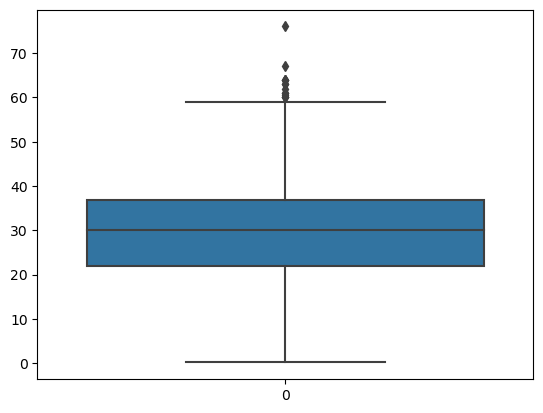

In [180]:
# 数値データのカテゴライズ化：Age
sns.boxplot(df["Age"])
"""
何分割する？
今回は５分割
以下でほぼ全体の1/4ずつ
・～２２歳
・２３～３０歳
・３１～３７歳
・３８～５９歳
残り「６０～１００歳」で１グループ
"""

In [186]:
"""
数値データのカテゴライズ化：pd.cut()
・pd.cut()：数値データのカテゴライズに役立つ関数
・pd.cut(x, bins, labels, right)
    ・x:分割するデータ
    ・bins:分割基準のリスト、[0, 10, 30]とすると０～１０、１０～３０でカテゴライズ
    ・label:分割後に割り当てるカテゴリの値リスト
    ・right:境界値の小さい方をグループに含めるときはTrue(デフォルト)、大きい方を含めるときはFalse
        ０～１０のグループでは
            Trueなら0を含んで10を含まない
            Falseなら10を含んで0を含まない
            （rightについては正しいかどうかあいまいなので、追加で調べる必要あり、多分この説明は逆？）
"""

'\n数値データのカテゴライズ化：pd.cut()\n・pd.cut()：数値データのカテゴライズに役立つ関数\n・pd.cut(x, bins, labels, right)\n    ・x:分割するデータ\n    ・bins:分割基準のリスト、[0, 10, 30]とすると０～１０、１０～３０でカテゴライズ\n    ・label:分割後に割り当てるカテゴリの値リスト\n    ・right:境界値の小さい方をグループに含めるときはTrue(デフォルト)、大きい方を含めるときはFalse\n        ０～１０のグループでは\n            Trueなら0を含んで10を含まない\n            Falseなら10を含んで0を含まない\n            （rightについては正しいかどうかあいまいなので、追加で調べる必要あり、多分この説明は逆？）\n'

In [185]:
for df in data:
    df["Age_band"] = pd.cut(df["Age"],[0, 22, 30, 37, 59, 100], labels=range(5), right=False)
train["Age_band"].head()

0    1
1    3
2    1
3    2
4    2
Name: Age_band, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

<Axes: >

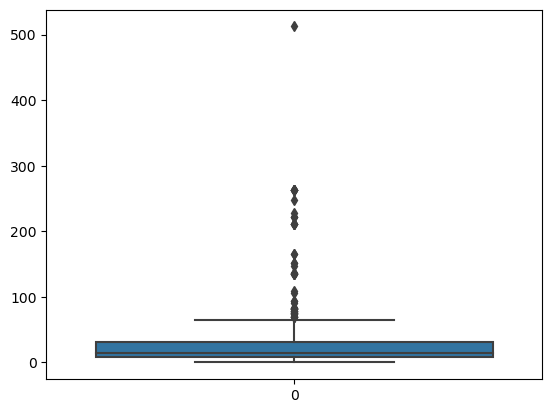

In [187]:
"""
演習　数値データのカテゴライズ化：Fare
問題１　Fareも５分割し、新たにFare_bandという列を作れ
    各グループは以下の基準で作成すること
    ・～８
    ・８～１５
    ・１５～３１
    ・３１～６６
    ・６６～５２０
    （境界値の小さい方をグループに含めること）
"""

sns.boxplot(df.Fare)

In [188]:
# 問題１
for df in data:
    df["Fare_band"] = pd.cut(df["Fare"], [0, 8, 15, 31, 66, 520], labels=range(5), right=False)
train.Fare_band.head()

0    0
1    4
2    0
3    3
4    1
Name: Fare_band, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

<Axes: xlabel='Age_band', ylabel='Survived'>

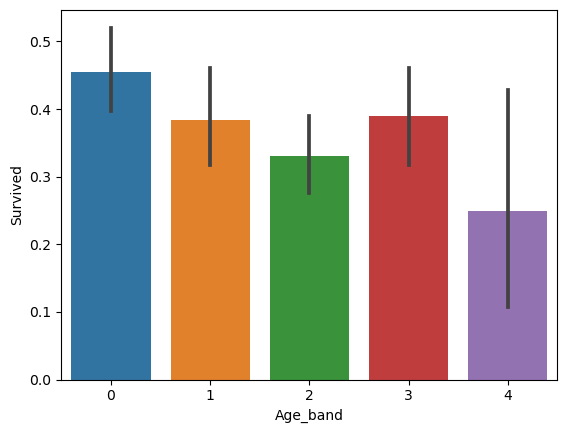

In [196]:
# カテゴライズした要素を切り口としてグラフ化
# Title/Age_band/Fare_bandとSurvivedの関連を可視化する

# Age_band

# barplotは平均とばらつき

# 解説のsns.barplot(train["Age_band"], train["Survived"])はエラーだった
sns.barplot(data = train, x = "Age_band", y = "Survived")

# ４番のグループは生存率にばらつきがある

<Axes: xlabel='Fare_band', ylabel='Survived'>

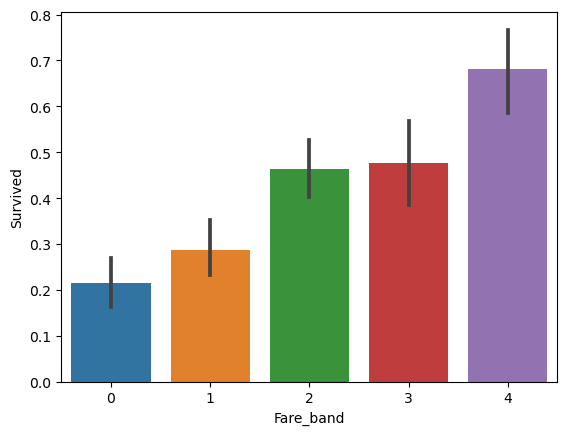

In [199]:
# Fare_band

sns.barplot(data = train, x = "Fare_band", y = "Survived")
# Fare（料金）が高いほど、生存率が高い傾向がある

<Axes: xlabel='Title', ylabel='Survived'>

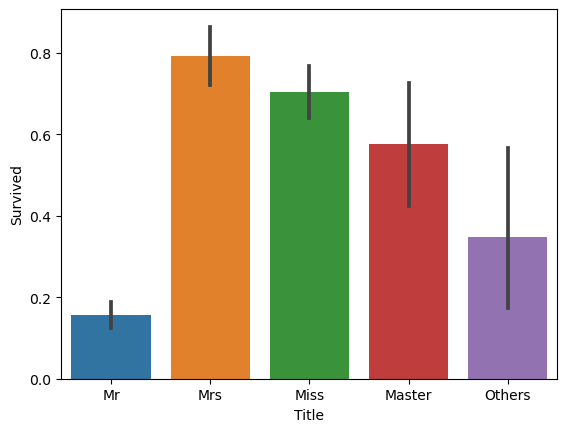

In [201]:
# Title(敬称)

sns.barplot(data = train, x = "Title", y = "Survived")
# Mr.（男性）の生存率が女性に比べて明らかに低い
# 女性間でも差はある

In [202]:
"""
不要なデータの削除
PassengerId:あまり生死と関係がなさそう
Name:Title列を作ったので用済み
Ticket:規則性が見出せず扱いに困る
Cabin:欠損値が多すぎたので不採用
Age:Age_band列を作ったので用済み
Fare:Fare_band列を作ったので用済み
"""

'\n不要なデータの削除\nPassengerId:あまり生死と関係がなさそう\nName:Title列を作ったので用済み\nTicket:規則性が見出せず扱いに困る\nCabin:欠損値が多すぎたので不採用\nAge:Age_band列を作ったので用済み\nFare:Fare_band列を作ったので用済み\n'

In [ ]:
# 不要なデータの削除

# 削除する列名をリストに格納
drop_columns = ["PassengerId", "Name", "Ticket", "Cabin", "Age", "Fare"]

train = train.drop(drop_columns, axis = 1)
test = test.drop(drop_columns, axis = 1)

data = [train, test]

In [ ]:
"""
文字列データの数値への置き換え

そもそもなぜ、文字列データを数値に置き換えるのか？
    学習モデルは数値しか理解できない
    "Title","Sex","Embarked"列が文字列の状態
"""

In [ ]:
# データを数値に置き換える

# 素直に値を置き換える

# loc[インデックス（行）,ヘッダー（列）]　行と列が条件に沿う値を抽出する

for df in data:
    # 性別を数字で置き換え
    df.loc[df["Sex"] == "female", "Sex"] = 0
    df.loc[df["Sex"] == "male", "Sex"] = 1
    
    # 敬称を数字で置き換え
    df.loc[df["Title"] == "Mr", "Title"] = 0
    df.loc[df["Title"] == "Miss", "Title"] = 1
    df.loc[df["Title"] == "Mrs", "Title"] = 2
    df.loc[df["Title"] == "Master", "Title"] = 3
    df.loc[df["Title"] == "Others", "Title"] = 4
    
    # 乗船した港３種類を数字で置き換え
    df.loc[df["Embarked"] == "S", "Embarked"] = 0
    df.loc[df["Embarked"] == "C", "Embarked"] = 1
    df.loc[df["Embarked"] == "Q", "Embarked"] = 2

In [ ]:
"""前処理を施したデータの保存"""

In [ ]:
# pickleというデータ形式でデータフレームを保存しよう
# pickle:pythonにおけるオブジェクトの読み書きが可能なデータ形式

# data[0]はdataというリストの0個目のオブジェクト、trainのこと
data[0].to_pickle("./titanic/titanic_train_jisaku.pkl")
data[1].to_pickle("./titanic/titanic_test_jisaku.pkl")

# フォルダを確認したが、作成されていなかった

In [ ]:
"""
Day7で学んだ知識を確認
・「予測したい変数」のことを専門用語で言うと？
    ・目的変数
・「予測するためにモデルに投入する変数」のことを専門用語で言うと？
    ・説明変数
・今回学んだ前処理、どのようなものがあった？
    ・データ加工して意味のある特徴を作る
    ・欠損値処理
    ・数値データのカテゴライズ化
    ・不要データの削除
    ・文字列データの数値への置き換え
"""

In [ ]:
"""
次回はモデル構築

機械学習で時間がかかるのは前処理、とても重要
丁寧な前処理の方が精度は高い

・titanicデータに対する前処理は今回の方法以外にも様々な方法があります
    webサイト等で調べてみてください
・kaggleで参加者が公開したNotebookも参考になる
    https://www.kaggle.com/c/titanic/notebooks
・実務の上で前処理に困ったら、似たようなデータ/問題を扱った論文や書籍を参考にするとよいでしょう
"""